# Getting started

Description :
       Health insurance cost prediction involves estimating the cost of health insurance premiums or claims based on factors like age, gender, Bmi, childern, smoker, and other relevant data. This is typically done using data analysis and machine learning techniques.

Attribute Information:
- age - Insurance holder's age in years
- sex - Gender of the insurance holder (Male or Female)
- bmi - BMI stands for Body Mass Index, the ideal range according to height and weight is 18.5 to 24.9
- children - Number of children
- smoker - Whether the insurance holder is a smoker or not
- region - Residential area of the person
- expenses - Individual medical costs billed by health insurance

Problem Statement :
Develop a solution to predict the insurance premium for health insurance holders

In [8]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"C:\Users\sharme k\project\insurance.csv")


In [9]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [10]:
print(df.tail())

      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


# Data preprocessing

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# EDA

<Axes: xlabel='smoker', ylabel='charges'>

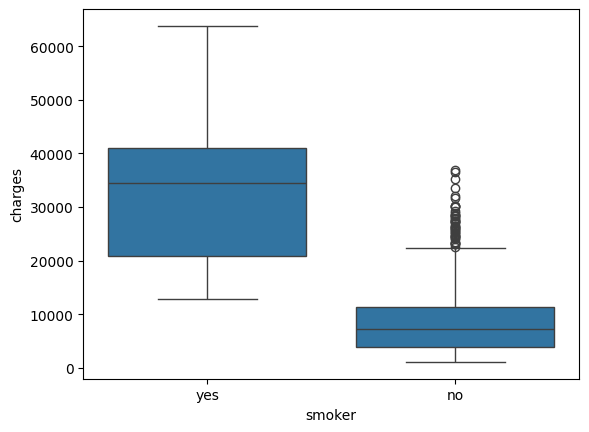

In [10]:

sns.boxplot(x='smoker',y='charges',data=df)

In [15]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

<Axes: xlabel='sex', ylabel='charges'>

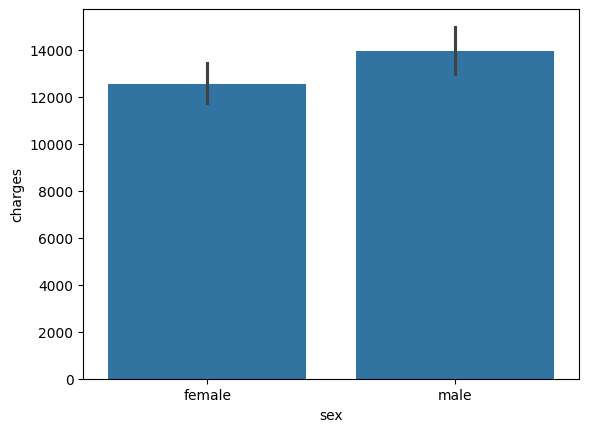

In [16]:
sns.barplot(x='sex', y='charges', data=df)

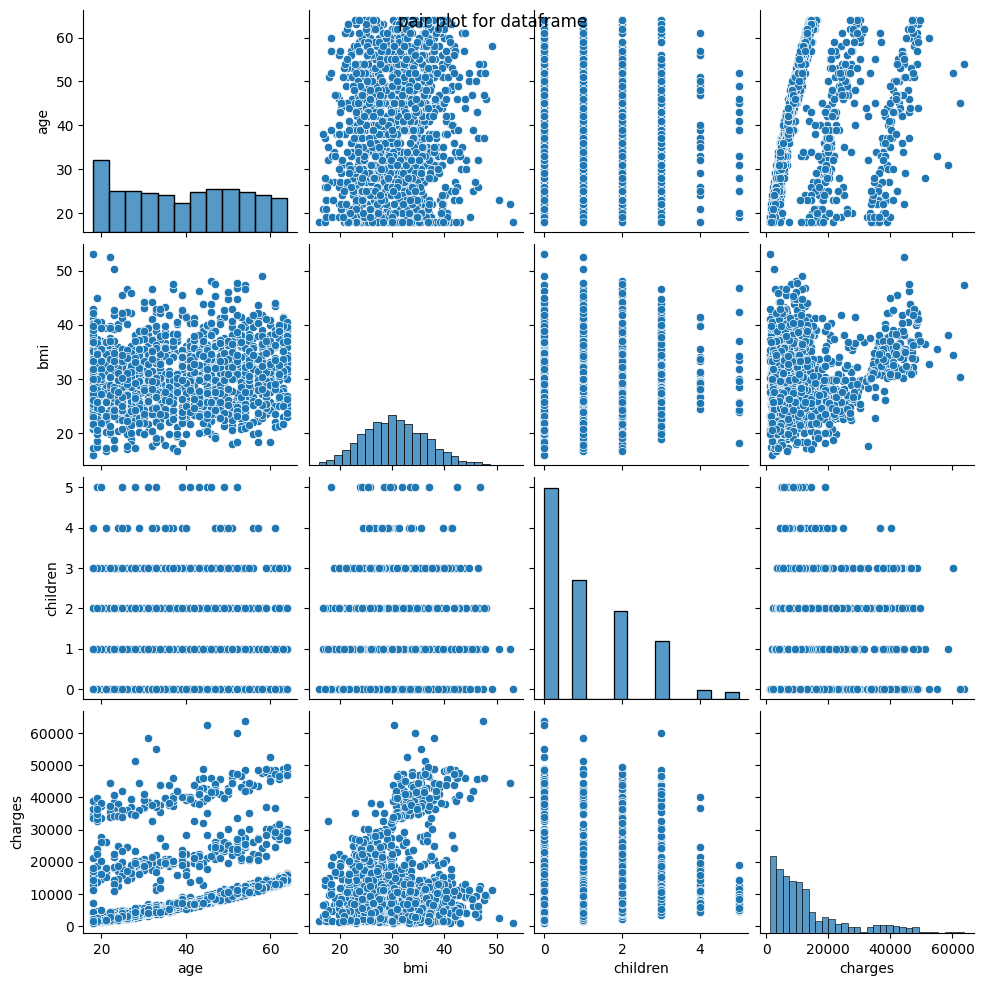

In [17]:
sns.pairplot(df)
plt.suptitle('pair plot for dataframe')
plt.show() 

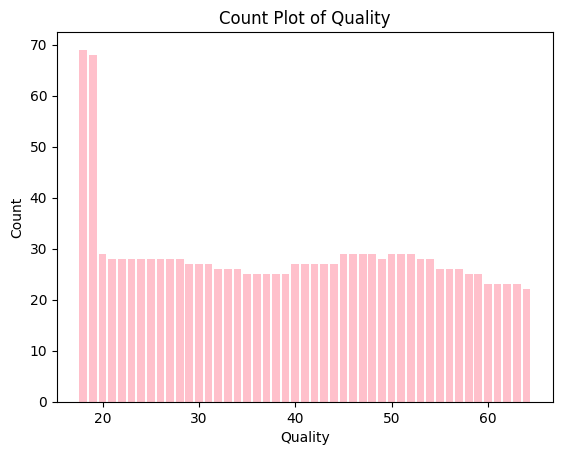

In [18]:
age_counts = df['age'].value_counts()
plt.bar(age_counts.index, age_counts, color='pink')
plt.title('Count Plot of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In [19]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='pink', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'female'

<Figure size 1500x1000 with 0 Axes>

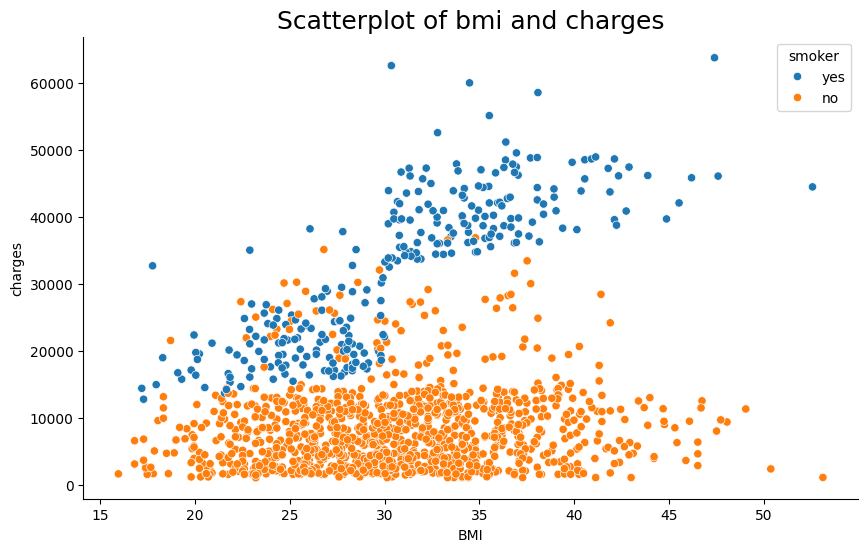

In [12]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x = 'bmi', y = 'charges', hue='smoker', data=df)
plt.title('Scatterplot of bmi and charges', fontsize=18)
plt.xlabel('BMI')
plt.ylabel('charges')
sns.despine()

C:\Users\sharme k\AppData\Local\Temp\ipykernel_12248\4058270766.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], color = 'g');


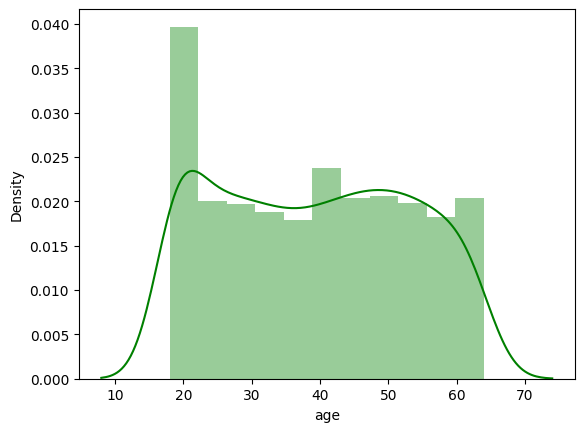

In [4]:
sns.distplot(df['age'], color = 'g');

C:\Users\sharme k\AppData\Local\Temp\ipykernel_12248\3986589030.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges']);


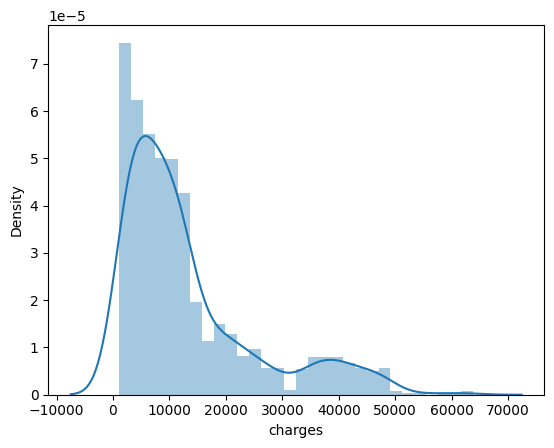

In [5]:
sns.distplot(df['charges']);

In [10]:
num_df = df.select_dtypes(exclude='object')
num_df

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


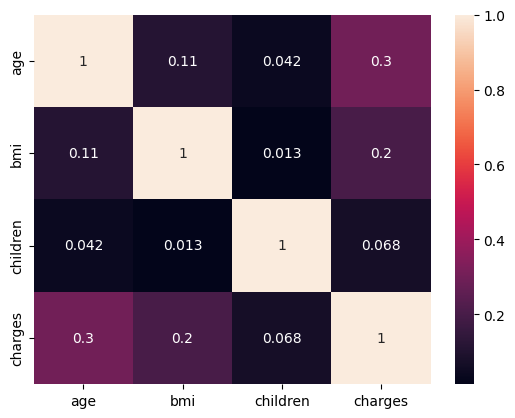

In [11]:
sns.heatmap(num_df.corr(), annot = True);

# CONCLUSION

Summarizing the key insights obtained:

- A quarter of insurance holders (25%) claim sums exceeding 16,639.91 USD.
- Majority of individuals are from the southeast region, and they tend to incur the highest charges.
- There's a significant rise in expenses as age increases.
- Non-smokers demonstrate lower vulnerability to higher charges.
- Smokers with a BMI exceeding 30 display a higher likelihood of claiming over 30,000 USD.

# FEATURE ENGINEERING

# one hot encoding

In [21]:
num_cols = ('age','bmi','children')
cat_cols = ('sex','smoker','region')

In [22]:
num_cols


('age', 'bmi', 'children')

In [23]:
cat_cols

('sex', 'smoker', 'region')

In [22]:


import pandas as pd
from sklearn.preprocessing import OneHotEncoder
data = {'age': [18,19],
        'sex': ['Male', 'female'],
        'smoker': ['yes', 'No']
        }
df = pd.DataFrame(data)
print(f"insurence data : \n{df}")
categoricalcolumn = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[categoricalcolumn])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categoricalcolumn))
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categoricalcolumn, axis=1)
print(f"encoded insurence data: \n{df_encoded}")


insurence data : 
   age     sex smoker
0   18    Male    yes
1   19  female     No
encoded insurence data: 
   age  sex_Male  sex_female  smoker_No  smoker_yes
0   18       1.0         0.0        0.0         1.0
1   19       0.0         1.0        1.0         0.0


# MODEL BUIDLING

In [1]:
import numpy as np
import pandas as pd

# feature scaling and encoding
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# train and testing data
from sklearn.model_selection import train_test_split

# regression evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error

# models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import pickle

In [8]:
def preprocess_inputs(df):
    df = df.copy()

    # splitting the dataset into X and y
    X = df.drop('charges', axis=1)
    y = df['charges']

    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

    # categorical columns
    cat_cols = ['sex', 'smoker', 'region']

    # numerical columns
    num_cols = ['age', 'bmi', 'children']

    # one hot encode categorical columns
    encoder = OneHotEncoder(drop='first', sparse_output=False)

    x_train_encode = encoder.fit_transform(x_train[cat_cols])
    x_test_encode = encoder.transform(x_test[cat_cols])

    x_train_encoded = pd.DataFrame(x_train_encode, index=x_train.index, columns=encoder.get_feature_names_out(cat_cols))
    x_test_encoded = pd.DataFrame(x_test_encode, index=x_test.index, columns=encoder.get_feature_names_out(cat_cols))

    # scale numerical columns
    scaler = StandardScaler()
    
    x_train_scale = scaler.fit_transform(x_train[num_cols])
    x_test_scale = scaler.transform(x_test[num_cols])

    x_train_scaled = pd.DataFrame(x_train_scale, index=x_train.index, columns=num_cols)
    x_test_scaled = pd.DataFrame(x_test_scale, index=x_test.index, columns=num_cols)

    # concatenate numerical and categorical features
    x_train = pd.concat([x_train_scaled, x_train_encoded], axis=1)
    x_test = pd.concat([x_test_scaled, x_test_encoded], axis=1)

    return x_train, x_test, y_train, y_test, encoder, scaler

In [7]:
x_train, x_test, y_train, y_test, encoder, scaler = preprocess_inputs(df)

In [9]:
print(f'x_train shape {x_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'x_test shape {x_test.shape}')
print(f'y_test shape {y_test.shape}')

x_train shape (1070, 8)
y_train shape (1070,)
x_test shape (268, 8)
y_test shape (268,)


In [10]:
x_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1306,-0.718505,-1.437015,-0.915145,0.0,1.0,0.0,0.0,0.0
124,0.558926,0.521715,1.606414,0.0,0.0,1.0,0.0,0.0
588,1.552484,0.845599,-0.915145,0.0,0.0,0.0,0.0,0.0
1127,-0.292695,0.837482,0.765894,0.0,0.0,0.0,1.0,0.0
201,0.629894,0.248158,-0.074626,0.0,0.0,0.0,1.0,0.0


In [14]:
y_train.head()

1306    16115.30450
124     10115.00885
588     13635.63790
1127     5836.52040
201      8871.15170
Name: charges, dtype: float64

In [12]:
x_test.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
12,-1.144316,0.600453,-0.915145,1.0,0.0,0.0,0.0,1.0
306,-0.789474,-0.519748,0.765894,0.0,0.0,0.0,0.0,1.0
318,0.346021,-0.496208,-0.915145,0.0,0.0,1.0,0.0,0.0
815,-1.357221,0.123150,-0.915145,0.0,0.0,0.0,1.0,0.0
157,-1.499158,-0.897208,-0.915145,1.0,1.0,0.0,0.0,0.0


In [13]:
y_test.head()

12      1826.84300
306    20177.67113
318     7421.19455
815     1877.92940
157    15518.18025
Name: charges, dtype: float64

# MODEL ASSESSMENT

1.LINEAR REEGRESSION

In [15]:
model_lr = LinearRegression()

model_lr.fit(x_train, y_train)

LinearRegression()

In [16]:
y_pred_lr = model_lr.predict(x_test)

In [17]:
r2_score(y_pred_lr, y_test)

0.7138367815280162

In [18]:
mean_absolute_error(y_pred_lr, y_test)

3916.4377758106107

In [19]:
y_pred_lr = model_lr.predict(x_test)

linear_reg_mse = mean_squared_error(y_test, y_pred_lr)
linear_reg_rmse = root_mean_squared_error(y_test, y_pred_lr)
linear_reg_mae = mean_absolute_error(y_test, y_pred_lr)
linear_reg_r2_score = r2_score(y_test, y_pred_lr)

# Evaluation Metrics
print(f'Mean Squared Error using Linear Regression : {linear_reg_mse}')
print(f'Root Mean Squared Error using Linear Regression : {linear_reg_rmse}')
print(f'Absolute Mean Error using Linear Regression: {linear_reg_mae}')
print(('The r2_score using Linear Regression : {}'.format(linear_reg_r2_score)))

Mean Squared Error using Linear Regression : 32193193.042996
Root Mean Squared Error using Linear Regression : 5673.904567667313
Absolute Mean Error using Linear Regression: 3916.4377758106107
The r2_score using Linear Regression : 0.7946968492150817


2. DECISION TREE

In [20]:
model_dt = DecisionTreeRegressor()

model_dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [24]:
y_pred_dt = model_dt.predict(x_test)

decision_tree_mse = mean_squared_error(y_test, y_pred_dt)
decision_tree_rmse = root_mean_squared_error(y_test, y_pred_dt)
decision_tree_mae = mean_absolute_error(y_test, y_pred_dt)
decision_tree_r2_score = r2_score(y_test, y_pred_dt)

print(f"Mean Squared Error using Decision Tree Regressor : {decision_tree_mse}")
print(f"Root Mean Squared Error using Decision Tree Regressor : {decision_tree_rmse}")
print(f"Mean Absolute Error using Decision Tree Regressor : {decision_tree_mae}")
print(f"r2_score using Decision Tree Regressor : {decision_tree_r2_score}")

Mean Squared Error using Decision Tree Regressor : 42197186.89962999
Root Mean Squared Error using Decision Tree Regressor : 6495.936183463473
Mean Absolute Error using Decision Tree Regressor : 3269.06216430597
r2_score using Decision Tree Regressor : 0.7308991558189379


3. KNN 

In [25]:
model_knn = KNeighborsRegressor()

model_knn.fit(x_train, y_train)

KNeighborsRegressor()

In [26]:
y_pred_knn = model_knn.predict(x_test)

knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_rmse = root_mean_squared_error(y_test, y_pred_knn)
knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_r2_score = r2_score(y_test, y_pred_knn)

print(f"Mean squared error using KNN is {knn_mse}")
print(f"Root mean squared error using KNN is {knn_rmse}")
print(f"Mean absolute error using KNN is {knn_mae}")
print(f"r2_score using KNN is {knn_r2_score}")

Mean squared error using KNN is 44064356.39774805
Root mean squared error using KNN is 6638.098854171129
Mean absolute error using KNN is 4123.412543294776
r2_score using KNN is 0.7189918007298928


4. RANDOM FOREST

In [27]:
model_rf = RandomForestRegressor()

model_rf.fit(x_train, y_train)

RandomForestRegressor()

In [28]:
y_pred_lr = model_rf.predict(x_test)

random_forest_mse = mean_squared_error(y_test, y_pred_lr)
random_forest_rmse = root_mean_squared_error(y_test, y_pred_lr)
random_forest_mae = mean_absolute_error(y_test, y_pred_lr)
random_forest_r2_score = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error using Random Forest Regressor : {random_forest_mse}")
print(f"Root Mean Squared Error using Random Forest Regressor : {random_forest_rmse}")
print(f"Mean Absolute Error using Random Forest Regressor : {random_forest_mae}")
print(f"r2_score Error using Random Forest Regressor : {random_forest_r2_score}")

Mean Squared Error using Random Forest Regressor : 20705161.395980302
Root Mean Squared Error using Random Forest Regressor : 4550.292451698056
Mean Absolute Error using Random Forest Regressor : 2806.1426819683234
r2_score Error using Random Forest Regressor : 0.8679585816036401


5. GRADIENT BOOSTING

In [29]:
model_gb = GradientBoostingRegressor()

model_gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [30]:
y_pred_gb = model_gb.predict(x_test)

gradient_boosting_mse = mean_squared_error(y_test, y_pred_gb)
gradient_boosting_rmse = root_mean_squared_error(y_test, y_pred_gb)
gradient_boosting_mae = mean_absolute_error(y_test, y_pred_gb)
gradient_boosting_r2_score = r2_score(y_test, y_pred_gb)

print(f"Mean Squared Error using Gradient Boosting Regressor : {gradient_boosting_mse}")
print(f"Root Mean Squared Error using Gradient Boosting Regressor : {gradient_boosting_rmse}")
print(f"Mean Absolute Error using Gradient Boosting Regressor : {gradient_boosting_mae}")
print(f"r2_sccore using Gradient Boosting Regressor : {gradient_boosting_r2_score}")

Mean Squared Error using Gradient Boosting Regressor : 15614120.739781082
Root Mean Squared Error using Gradient Boosting Regressor : 3951.4707059247044
Mean Absolute Error using Gradient Boosting Regressor : 2366.9181824172933
r2_sccore using Gradient Boosting Regressor : 0.9004252799549308


In [31]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest',
               'Gradient Boosting', 'KNN'],
    'RMSE' : [linear_reg_rmse, decision_tree_rmse, random_forest_rmse,
            gradient_boosting_rmse, knn_rmse],
    'r2_score' : [linear_reg_r2_score, decision_tree_r2_score, random_forest_r2_score, 
    gradient_boosting_r2_score, knn_r2_score]
})

models.sort_values(by='r2_score', ascending=False, ignore_index=True)

,Model,RMSE,r2_score
0,Gradient Boosting,3951.470706,0.900425
1,Random Forest,4550.292452,0.867959
2,Linear Regression,5673.904568,0.794697
3,Decision Tree,6495.936183,0.730899
4,KNN,6638.098854,0.718992


- As we can see through the evaluation metrics, RMSE and r2_score both is quite good for Gradient Boosting and Random Forest algorithms.<br>
- Among all the regressors, Decision Tree performs the worst, it maybe because tree based algorithms generally lack to perform with continuous numerical variables and unsuitability for accurate regression and continuous value prediction.<br>
- With notable RMSE and r2 scores, Gradient Boosting evidently emerges as the superior performer. Thus, we can confidently select Gradient Boosting as our final algorithm.

# SAVE THE BEST MODEL

In [32]:
## save encoder
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

## load encoder
# with open('encoder.pkl', 'rb') as f:
#     encoder = pickle.load(f)

In [33]:
## save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## load scaler
# with open('scaler.pkl', 'rb') as f:
#     s = pickle.load(f)

In [34]:
## save model
with open('model.pkl', 'wb') as f:
    pickle.dump(model_gb, f)

In [35]:
## load model
with open('model.pkl', 'rb') as f:
    m = pickle.load(f)